train data :  60000
test data :  10000
x_train_image :  (60000, 28, 28)
y_train_label :  (60000,)


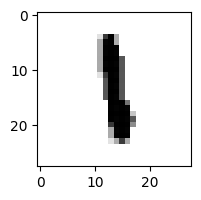

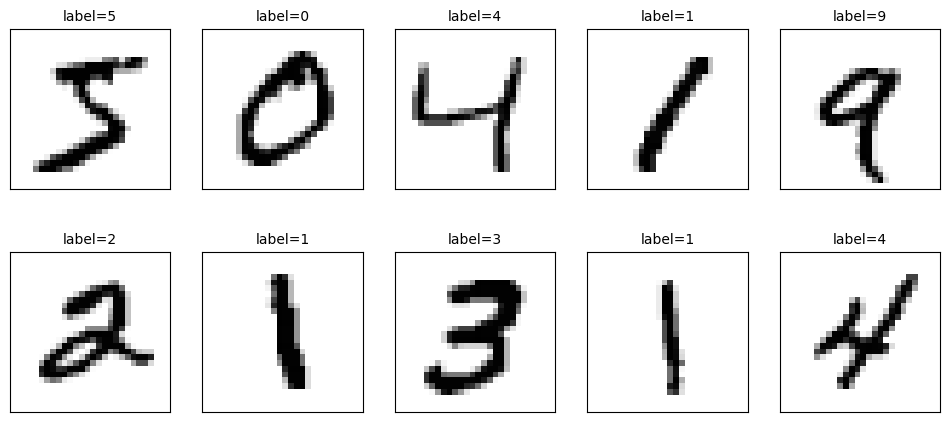

x_test_image :  (10000, 28, 28)
y_test_label :  (10000,)


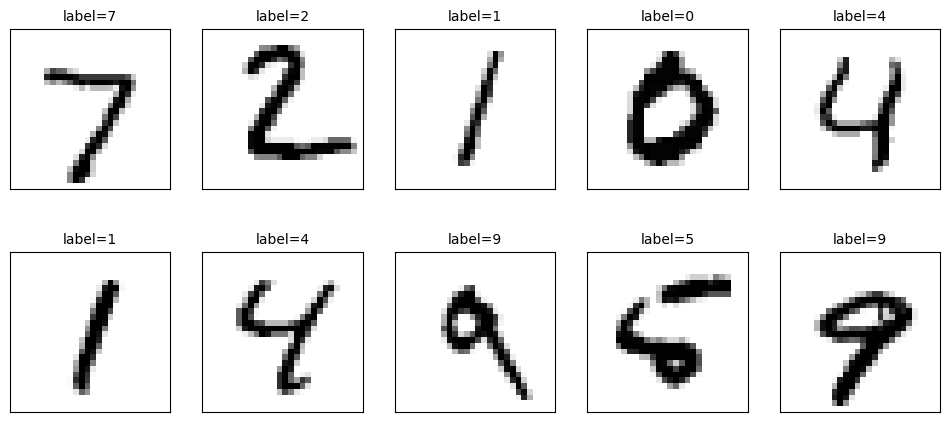

x_train :  (60000, 28, 28)
x_test :  (10000, 28, 28)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 400)               314000    
                                                                 
 dense_17 (Dense)            (None, 10)                4010      
                                                                 
Total params: 318010 (1.21 MB)
Trainable params: 318010 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
209/209 - 4s - loss: 0.6795 - accuracy: 0.8370 - val_loss: 0.3253 - val_accuracy: 0.9147 - 4s/epoch - 17ms/step
Epoch 2/50
209/209 - 2s - loss: 0.3052 - accuracy: 0.9139 - val_loss: 0.2594 - val_accuracy: 0.9261 -

In [ ]:
# 匯入 numpy 和 pandas 模組
import numpy as np
import pandas as pd
# 從 keras.utils 匯入 to_categroical，
from tensorflow.keras.utils import to_categorical
# 設定 seed
seed = 1232
np.random.seed(seed)

from tensorflow.keras.datasets import mnist,cifar10
(X_train_image, y_train_label),\
    (X_test_image, y_test_label) = mnist.load_data()

print('train data : ', len(X_train_image))
print('test data : ', len(X_test_image))

print('x_train_image : ', X_train_image.shape)
print('y_train_label : ', y_train_label.shape)

import matplotlib.pyplot as plt
def plot_image(image):
    # 設定圖形顯示大小
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    # 使用 plt.imshow() 顯示圖像，傳入參數是 28 X 28 的圖形，
    # cmap 參數設定為 binary 以黑白灰階顯示
    plt.imshow(image, cmap = 'binary')
    # 開始繪圖
    plt.show()

plot_image(X_train_image[200])

y_train_label[200]

def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    # 設定顯示圖形大小
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    # 如果顯示筆數大於25 則將他設定為25 以避免錯誤
    if num > 25: num = 25
    # 使用 for 迴圈依序畫出 num 個數字圖形
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i) # 建立 5 X 5 的 subgraph 子圖形
        ax.imshow(images[idx], cmap = 'binary') # 畫出 subgraph 子圖形
        title = "label=" + str(labels[idx]) # 設定子圖形 title 顯示標籤欄位
        if len(prediction) > 0: # 如果 prediction 有傳入值
            title += ",predict=" + str(prediction[idx]) # 將 prediction 加入 title
        ax.set_title(title, fontsize = 10) # 設定標題大小
        ax.set_xticks([]); ax.set_yticks([]) # 設定不顯示刻度
        idx += 1 # 讀取下一筆
    plt.show() # 開始畫圖

plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

print('x_test_image : ', X_test_image.shape)
print('y_test_label : ', y_test_label.shape)

plot_images_labels_prediction(X_test_image, y_test_label, [], 0, 10)

X_Train = X_train_image.astype('float32')
X_Test = X_test_image.astype('float32')

print('x_train : ', X_Train.shape)
print('x_test : ', X_Test.shape)

X_Train_normalize = X_Train.reshape((X_Train.shape[0], 28, 28, 1)) / 255.0
X_Test_normalize = X_Test.reshape((X_Test.shape[0], 28, 28, 1)) / 255.0


y_train_label[:5]

y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)

y_TrainOneHot[:5]

from tensorflow.keras import layers, metrics
from tensorflow.keras.layers import Dense,InputLayer,Flatten
from tensorflow.keras import models
import tensorflow as tf
tf.random.set_seed(seed)

model = models.Sequential()

model.add(InputLayer(input_shape=(28,28,1)))
model.add(Flatten())

model.add(Dense(400,  kernel_initializer = 'random_uniform',activation = 'sigmoid'))      #調整合適的參數以使準確度更高

model.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

print(model.summary())

loss_function = 'categorical_crossentropy'
optimize_function = 'Adam' # Adadelta , Adagrad ,Adam ,Adamax ,FTRL ,Nadam ,RMSprop ,sgd
model.compile(loss = loss_function, optimizer = optimize_function,metrics = ['accuracy'])

train_history = model.fit(x = X_Train_normalize, y = y_TrainOneHot,
                            validation_split = 0.2, epochs = 50, batch_size = 230,
                            verbose = 2)

def show_train_history(train_history, train, validation):       #印出訓練紀錄
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

scores = model.evaluate(X_Test_normalize, y_TestOneHot)       #印出準確率
print()
print('accuracy = ', scores[1])

prediction = np.argmax(model.predict(X_Test), axis = -1)
prediction

plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx = 340)

y_test_label = y_test_label.reshape(10000)

#使用 pandas 中的 crosstab 能夠很方便的建立混淆矩陣。
pd.crosstab(y_test_label, prediction, rownames = ['label'], colnames = ['predict'])

from tensorflow.keras.preprocessing import image
img_path = '/content/1.png'                   # 讀取並預處理要預測的圖片
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction_result = model.predict(img_array / 255.0)  # 使用模型進行預測

predicted_label = np.argmax(prediction_result)  # 解析預測結果
plt.rcParams['image.cmap'] = 'gray'
fig = plt.gcf()
fig.set_size_inches(2, 2)

ax = plt.subplot(1, 1, 1)
ax.imshow(img_array[0, :, :, 0], cmap='gray')

title = "Predict: " + str(predicted_label)
ax.set_title(title, fontsize=10)
plt.show()  # 開始畫圖


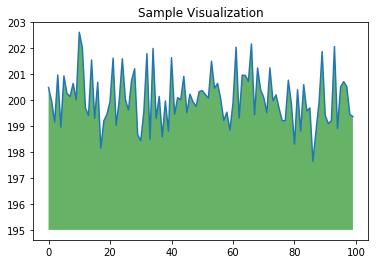